In [243]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.api as sm
from sklearn import metrics

In [2]:
df1=pd.read_csv("J:/UPGRAD/Machine Learning I/Logistic Regression/Telecom Churn/customer_data.csv")
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [3]:
df2=pd.read_csv("J:/UPGRAD/Machine Learning I/Logistic Regression/Telecom Churn/churn_data.csv")
df2.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df3=pd.read_csv("J:/UPGRAD/Machine Learning I/Logistic Regression/Telecom Churn/internet_data.csv")
df3.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [5]:
df_1=pd.merge(df1,df2,how="inner",on="customerID")
df_1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df=pd.merge(df_1,df3,how="inner",on="customerID")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,...,TotalCharges,Churn,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,Female,0,Yes,No,1,No,Month-to-month,Yes,Electronic check,...,29.85,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,Male,0,No,No,34,Yes,One year,No,Mailed check,...,1889.5,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,Male,0,No,No,2,Yes,Month-to-month,Yes,Mailed check,...,108.15,Yes,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,Male,0,No,No,45,No,One year,No,Bank transfer (automatic),...,1840.75,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Female,0,No,No,2,Yes,Month-to-month,Yes,Electronic check,...,151.65,Yes,No,Fiber optic,No,No,No,No,No,No


In [7]:
df.shape

(7043, 21)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
dtypes: float64(1), int64(2), obj

In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [10]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')

In [11]:
varlist=['PhoneService','Partner','Dependents','PaperlessBilling','Churn']
df[varlist]=df[varlist].apply(lambda x:x.map({'Yes':1,'No':0}))

In [12]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,...,TotalCharges,Churn,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,Female,0,1,0,1,0,Month-to-month,1,Electronic check,...,29.85,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,Male,0,0,0,34,1,One year,0,Mailed check,...,1889.5,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,Male,0,0,0,2,1,Month-to-month,1,Mailed check,...,108.15,1,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,Male,0,0,0,45,0,One year,0,Bank transfer (automatic),...,1840.75,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Female,0,0,0,2,1,Month-to-month,1,Electronic check,...,151.65,1,No,Fiber optic,No,No,No,No,No,No


In [13]:
df.Churn.unique()

array([0, 1], dtype=int64)

In [14]:
df.Partner.unique()

array([1, 0], dtype=int64)

In [15]:
df.PhoneService.unique()

array([0, 1], dtype=int64)

In [16]:
df.Dependents.unique()

array([0, 1], dtype=int64)

In [17]:
df.PaperlessBilling.unique()

array([1, 0], dtype=int64)

In [18]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')

In [19]:
df.gender.unique()

array(['Female', 'Male'], dtype=object)

In [20]:
df.SeniorCitizen.unique()

array([0, 1], dtype=int64)

In [21]:
df.tenure.unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39], dtype=int64)

In [22]:
df.Contract.unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [23]:
df.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [24]:
df.MultipleLines.unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [25]:
df.InternetService.unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [26]:
df.OnlineSecurity.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [27]:
df.OnlineBackup.unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [28]:
df.DeviceProtection.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [29]:
df.TechSupport.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [30]:
df.StreamingTV.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [31]:
df.StreamingMovies.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [32]:
dummy=pd.get_dummies(df[["InternetService","PaymentMethod","Contract","gender"]],drop_first=True)

In [33]:
df=pd.concat([df,dummy],axis=1)

In [34]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,...,StreamingTV,StreamingMovies,InternetService_Fiber optic,InternetService_No,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_One year,Contract_Two year,gender_Male
0,7590-VHVEG,Female,0,1,0,1,0,Month-to-month,1,Electronic check,...,No,No,0,0,0,1,0,0,0,0
1,5575-GNVDE,Male,0,0,0,34,1,One year,0,Mailed check,...,No,No,0,0,0,0,1,1,0,1
2,3668-QPYBK,Male,0,0,0,2,1,Month-to-month,1,Mailed check,...,No,No,0,0,0,0,1,0,0,1
3,7795-CFOCW,Male,0,0,0,45,0,One year,0,Bank transfer (automatic),...,No,No,0,0,0,0,0,1,0,1
4,9237-HQITU,Female,0,0,0,2,1,Month-to-month,1,Electronic check,...,No,No,1,0,0,1,0,0,0,0


In [35]:
#creating dummy for rest of the variable and dropping the big column name
dummy2=pd.get_dummies(df[["MultipleLines","OnlineSecurity","StreamingMovies","StreamingTV","TechSupport","DeviceProtection","OnlineBackup"]])

In [36]:
dummy3=dummy2.drop(["MultipleLines_No phone service","OnlineSecurity_No internet service","OnlineBackup_No internet service","DeviceProtection_No internet service","TechSupport_No internet service","StreamingTV_No internet service","StreamingMovies_No internet service"],axis=1)

In [37]:
df=pd.concat([df,dummy3],axis=1)

In [38]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,...,StreamingMovies_No,StreamingMovies_Yes,StreamingTV_No,StreamingTV_Yes,TechSupport_No,TechSupport_Yes,DeviceProtection_No,DeviceProtection_Yes,OnlineBackup_No,OnlineBackup_Yes
0,7590-VHVEG,Female,0,1,0,1,0,Month-to-month,1,Electronic check,...,1,0,1,0,1,0,1,0,0,1
1,5575-GNVDE,Male,0,0,0,34,1,One year,0,Mailed check,...,1,0,1,0,1,0,0,1,1,0
2,3668-QPYBK,Male,0,0,0,2,1,Month-to-month,1,Mailed check,...,1,0,1,0,1,0,1,0,0,1
3,7795-CFOCW,Male,0,0,0,45,0,One year,0,Bank transfer (automatic),...,1,0,1,0,0,1,0,1,1,0
4,9237-HQITU,Female,0,0,0,2,1,Month-to-month,1,Electronic check,...,1,0,1,0,1,0,1,0,1,0


In [39]:
df=df.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'],axis=1)

In [40]:
df.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_Yes,StreamingTV_No,StreamingTV_Yes,TechSupport_No,TechSupport_Yes,DeviceProtection_No,DeviceProtection_Yes,OnlineBackup_No,OnlineBackup_Yes
0,7590-VHVEG,0,1,0,1,0,1,29.85,29.85,0,...,1,0,1,0,1,0,1,0,0,1
1,5575-GNVDE,0,0,0,34,1,0,56.95,1889.5,0,...,1,0,1,0,1,0,0,1,1,0
2,3668-QPYBK,0,0,0,2,1,1,53.85,108.15,1,...,1,0,1,0,1,0,1,0,0,1
3,7795-CFOCW,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,1,0,0,1,0,1,1,0
4,9237-HQITU,0,0,0,2,1,1,70.70,151.65,1,...,1,0,1,0,1,0,1,0,1,0


In [41]:
df.TotalCharges=df.TotalCharges.convert_objects(convert_numeric=True)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
customerID                               7043 non-null object
SeniorCitizen                            7043 non-null int64
Partner                                  7043 non-null int64
Dependents                               7043 non-null int64
tenure                                   7043 non-null int64
PhoneService                             7043 non-null int64
PaperlessBilling                         7043 non-null int64
MonthlyCharges                           7043 non-null float64
TotalCharges                             7032 non-null float64
Churn                                    7043 non-null int64
InternetService_Fiber optic              7043 non-null uint8
InternetService_No                       7043 non-null uint8
PaymentMethod_Credit card (automatic)    7043 non-null uint8
PaymentMethod_Electronic check           7043 non-null uint8
PaymentMethod_Mailed check        

In [43]:
to_check_outliers=df[["tenure","MonthlyCharges","TotalCharges","SeniorCitizen"]]
to_check_outliers.describe(percentiles=[.25,.50,.75,.90,.95,.99])

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen
count,7043.000000,7043.000000,7032.000000,7043.000000
mean,32.371149,64.761692,2283.300441,0.162147
std,24.559481,30.090047,2266.771362,0.368612
min,0.000000,18.250000,18.800000,0.000000
25%,9.000000,35.500000,401.450000,0.000000
50%,29.000000,70.350000,1397.475000,0.000000
75%,55.000000,89.850000,3794.737500,0.000000
90%,69.000000,102.600000,5976.640000,1.000000
95%,72.000000,107.400000,6923.590000,1.000000
99%,72.000000,114.729000,8039.883000,1.000000


In [44]:
#there is a gradual increase which suggest no outliers.

C:\Users\User\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\User\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


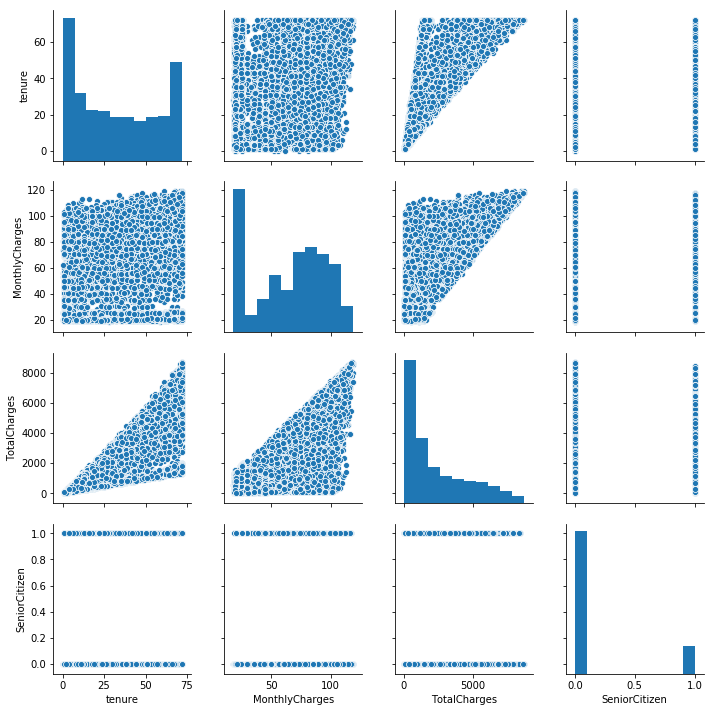

In [46]:
sns.pairplot(to_check_outliers)

In [47]:
df.isnull().sum()

customerID                                0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
InternetService_Fiber optic               0
InternetService_No                        0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
Contract_One year                         0
Contract_Two year                         0
gender_Male                               0
MultipleLines_No                          0
MultipleLines_Yes                         0
OnlineSecurity_No                         0
OnlineSecurity_Yes                        0
StreamingMovies_No              

In [48]:
round(100*(df.isnull().sum()/len(df.index)),2)

customerID                               0.00
SeniorCitizen                            0.00
Partner                                  0.00
Dependents                               0.00
tenure                                   0.00
PhoneService                             0.00
PaperlessBilling                         0.00
MonthlyCharges                           0.00
TotalCharges                             0.16
Churn                                    0.00
InternetService_Fiber optic              0.00
InternetService_No                       0.00
PaymentMethod_Credit card (automatic)    0.00
PaymentMethod_Electronic check           0.00
PaymentMethod_Mailed check               0.00
Contract_One year                        0.00
Contract_Two year                        0.00
gender_Male                              0.00
MultipleLines_No                         0.00
MultipleLines_Yes                        0.00
OnlineSecurity_No                        0.00
OnlineSecurity_Yes                

In [50]:
df=df[~np.isnan(df['TotalCharges'])]  #removing the null values

In [51]:
round(100*(df.isnull().sum()/len(df.index)),2)

customerID                               0.0
SeniorCitizen                            0.0
Partner                                  0.0
Dependents                               0.0
tenure                                   0.0
PhoneService                             0.0
PaperlessBilling                         0.0
MonthlyCharges                           0.0
TotalCharges                             0.0
Churn                                    0.0
InternetService_Fiber optic              0.0
InternetService_No                       0.0
PaymentMethod_Credit card (automatic)    0.0
PaymentMethod_Electronic check           0.0
PaymentMethod_Mailed check               0.0
Contract_One year                        0.0
Contract_Two year                        0.0
gender_Male                              0.0
MultipleLines_No                         0.0
MultipleLines_Yes                        0.0
OnlineSecurity_No                        0.0
OnlineSecurity_Yes                       0.0
StreamingM

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 32 columns):
customerID                               7032 non-null object
SeniorCitizen                            7032 non-null int64
Partner                                  7032 non-null int64
Dependents                               7032 non-null int64
tenure                                   7032 non-null int64
PhoneService                             7032 non-null int64
PaperlessBilling                         7032 non-null int64
MonthlyCharges                           7032 non-null float64
TotalCharges                             7032 non-null float64
Churn                                    7032 non-null int64
InternetService_Fiber optic              7032 non-null uint8
InternetService_No                       7032 non-null uint8
PaymentMethod_Credit card (automatic)    7032 non-null uint8
PaymentMethod_Electronic check           7032 non-null uint8
PaymentMethod_Mailed check        

In [53]:
#now the data is uniform

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
x=df.drop(['Churn',"customerID"],axis=1) #churn values need to be predict and customer id is of no us

In [56]:
x.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_Fiber optic,InternetService_No,...,StreamingMovies_No,StreamingMovies_Yes,StreamingTV_No,StreamingTV_Yes,TechSupport_No,TechSupport_Yes,DeviceProtection_No,DeviceProtection_Yes,OnlineBackup_No,OnlineBackup_Yes
0,0,1,0,1,0,1,29.85,29.85,0,0,...,1,0,1,0,1,0,1,0,0,1
1,0,0,0,34,1,0,56.95,1889.50,0,0,...,1,0,1,0,1,0,0,1,1,0
2,0,0,0,2,1,1,53.85,108.15,0,0,...,1,0,1,0,1,0,1,0,0,1
3,0,0,0,45,0,0,42.30,1840.75,0,0,...,1,0,1,0,0,1,0,1,1,0
4,0,0,0,2,1,1,70.70,151.65,1,0,...,1,0,1,0,1,0,1,0,1,0


In [57]:
y=df.Churn  #churn is out target variable

In [58]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [328]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=100)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [61]:
from sklearn.preprocessing import StandardScaler  #for feature scaling

In [62]:
scaler=StandardScaler()

In [63]:
x_train[["tenure","MonthlyCharges","TotalCharges"]]=scaler.fit_transform(x_train[["tenure","MonthlyCharges","TotalCharges"]])

C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

In [64]:
x_train.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_Fiber optic,InternetService_No,...,StreamingMovies_No,StreamingMovies_Yes,StreamingTV_No,StreamingTV_Yes,TechSupport_No,TechSupport_Yes,DeviceProtection_No,DeviceProtection_Yes,OnlineBackup_No,OnlineBackup_Yes
879,0,0,0,0.019693,1,1,-0.338074,-0.276449,0,0,...,1,0,1,0,1,0,1,0,0,1
5790,0,1,1,0.305384,0,1,-0.464443,-0.112702,0,0,...,0,1,0,1,1,0,1,0,0,1
6498,0,0,0,-1.286319,1,1,0.581425,-0.974430,1,0,...,1,0,1,0,1,0,0,1,0,1
880,0,0,0,-0.919003,1,1,1.505913,-0.550676,1,0,...,0,1,0,1,0,1,0,1,0,1
2784,0,0,1,-1.163880,1,1,1.106854,-0.835971,1,0,...,0,1,0,1,0,1,0,1,1,0


In [66]:
#let's chek the churn rate
churn=round(100*(sum(y)/len(y.index)),2)
churn

26.58

In [67]:
#around 27% is our churn rate

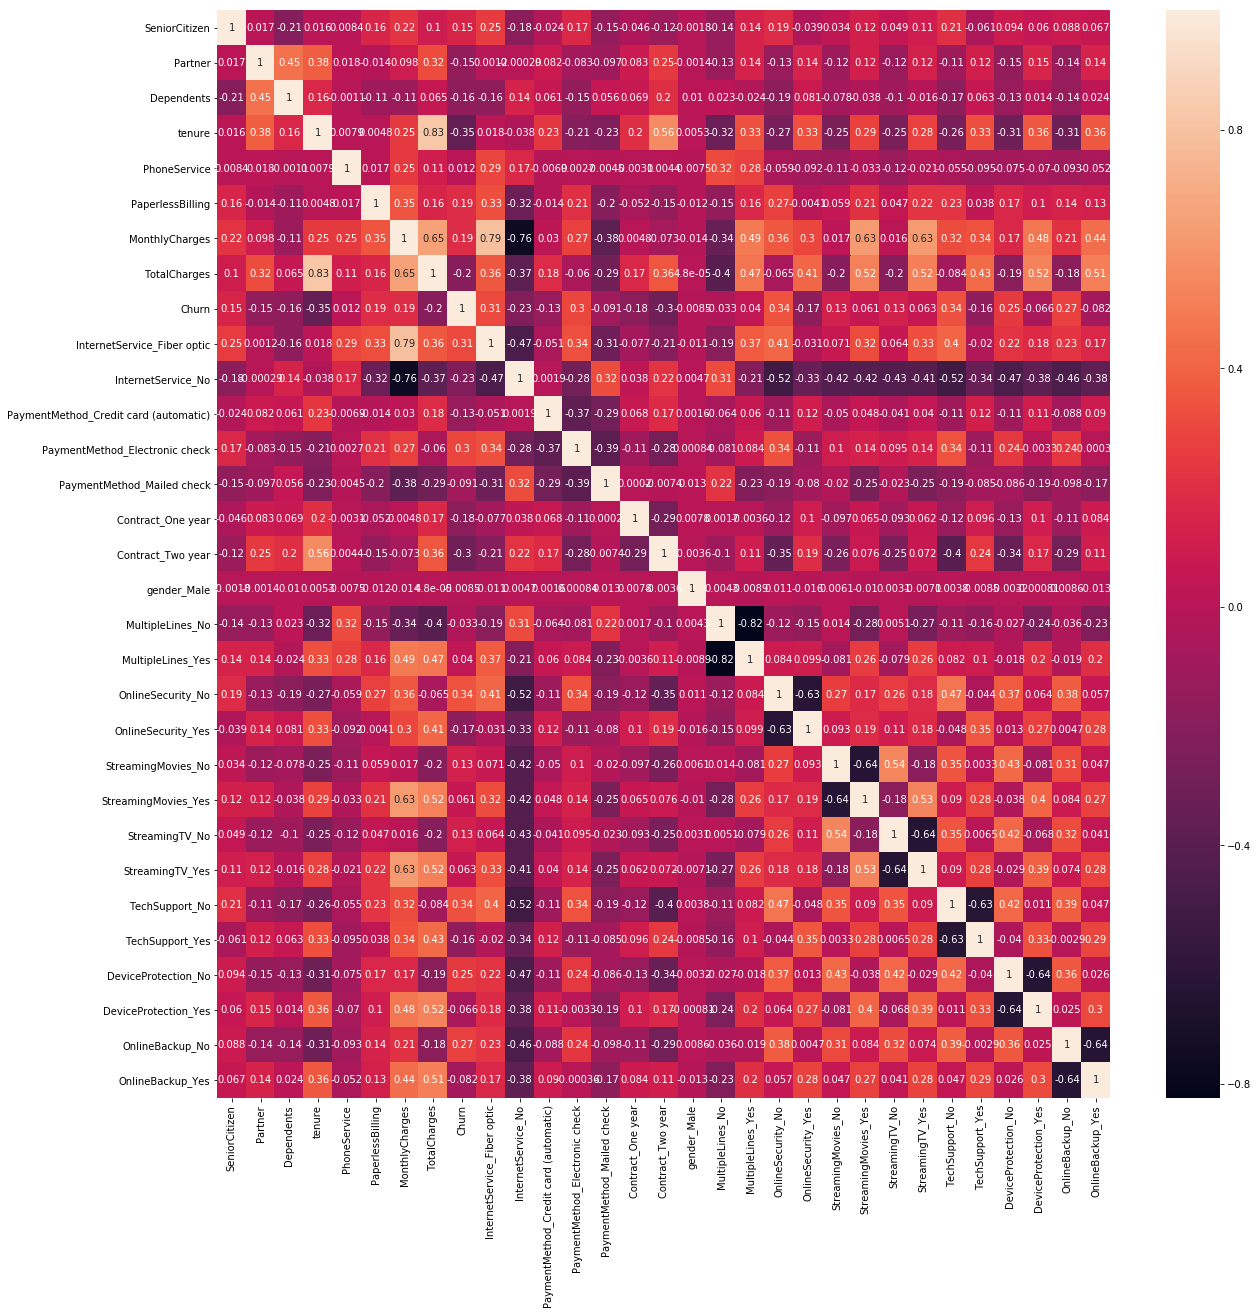

In [73]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

In [74]:
x_test=x_test.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                       'StreamingTV_No','StreamingMovies_No'], 1)

x_train=x_train.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                       'StreamingTV_No','StreamingMovies_No'], 1)

In [75]:
x_train.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_Fiber optic,InternetService_No,...,Contract_One year,Contract_Two year,gender_Male,MultipleLines_Yes,OnlineSecurity_Yes,StreamingMovies_Yes,StreamingTV_Yes,TechSupport_Yes,DeviceProtection_Yes,OnlineBackup_Yes
879,0,0,0,0.019693,1,1,-0.338074,-0.276449,0,0,...,0,0,1,1,0,0,0,0,0,1
5790,0,1,1,0.305384,0,1,-0.464443,-0.112702,0,0,...,0,0,0,0,0,1,1,0,0,1
6498,0,0,0,-1.286319,1,1,0.581425,-0.974430,1,0,...,0,0,0,0,0,0,0,0,1,1
880,0,0,0,-0.919003,1,1,1.505913,-0.550676,1,0,...,0,0,1,0,1,1,1,1,1,1
2784,0,0,1,-1.163880,1,1,1.106854,-0.835971,1,0,...,0,0,0,0,0,1,1,1,1,0


In [76]:
x_test.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_Fiber optic,InternetService_No,...,Contract_One year,Contract_Two year,gender_Male,MultipleLines_Yes,OnlineSecurity_Yes,StreamingMovies_Yes,StreamingTV_Yes,TechSupport_Yes,DeviceProtection_Yes,OnlineBackup_Yes
942,0,0,0,24,1,1,79.85,2001.00,1,0,...,0,0,1,0,0,1,0,0,0,0
3730,0,1,0,57,1,1,104.50,5921.35,1,0,...,0,0,0,1,0,1,1,0,1,1
1761,0,0,0,58,1,1,24.45,1513.60,0,1,...,0,1,1,1,0,0,0,0,0,0
2283,0,0,0,1,1,1,71.55,71.55,1,0,...,0,0,1,0,0,0,0,0,0,0
1872,0,1,1,41,1,0,19.70,804.25,0,1,...,0,1,0,0,0,0,0,0,0,0


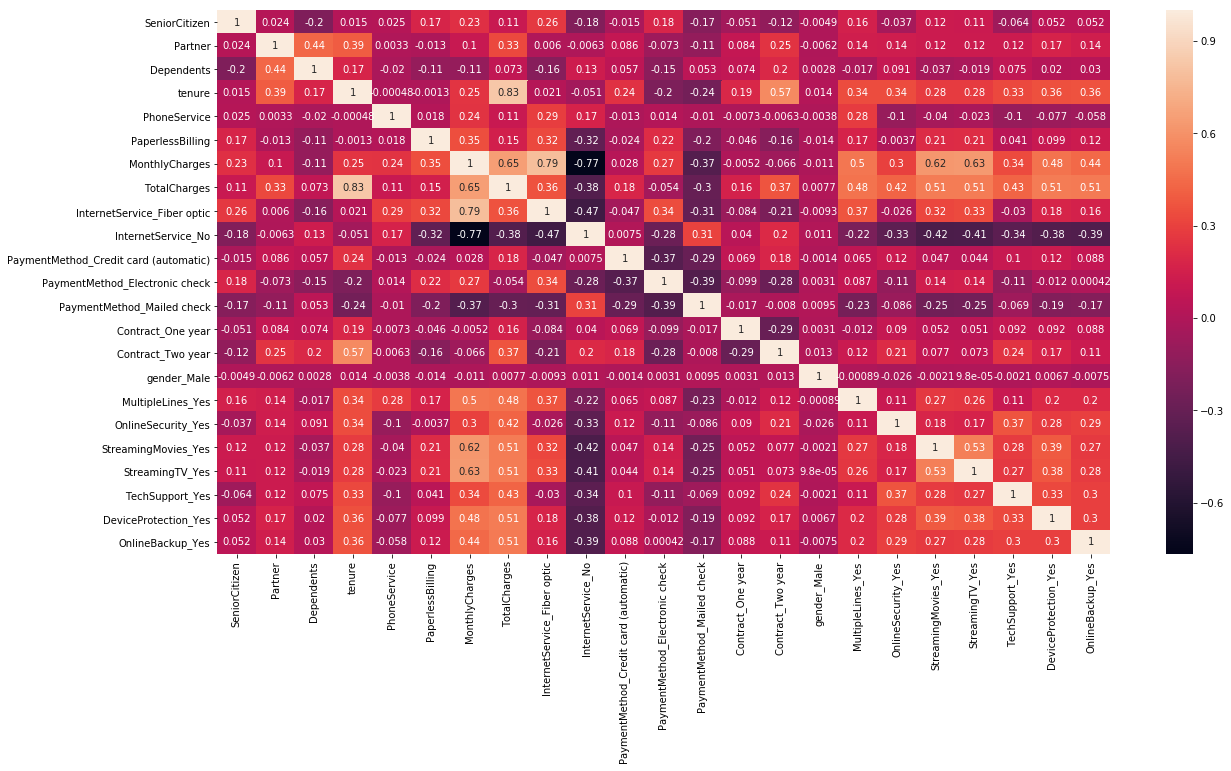

In [77]:
plt.figure(figsize=(20,10))
sns.heatmap(x_train.corr(),annot=True)

In [78]:
#model Building


In [79]:
x_train_sm=sm.add_constant(x_train)
logm1=sm.GLM(y_train,x_train_sm,family=sm.families.Binomial())

C:\Users\User\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [80]:
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.7
Date:                Tue, 22 Oct 2019   Deviance:                       4009.4
Time:                        20:17:33   Pearson chi2:                 6.07e+03
No. Iterations:                     7   Covariance Type:             nonrobust
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.9382      1.546     -2.547      0.011      -6.969      -0.908
SeniorCitizen                             0.3984      0.102      3.924      0.000       0.199       0.597
Partner                                   0.0374      0.094      0.399      0.690      -0.146       0.221
Dependents                               -0.1430      0.107     -1.332      0.183      -0.353       0.067
tenure                                   -1.5172      0.189     -8.015      0.000      -1.888      -1.146
PhoneService                              0.9507      0.789      1.205      0.228      -0.595       2.497
PaperlessBilling                          0.3254      0.090      3.614      0.000       0.149       0.502
MonthlyCharges                           -2.1806      1.160     -1.880      0.060      -4.454       0.092
TotalCharges                              0.7332      0.198      3.705      0.000       0.345       1.121
InternetService_Fiber optic               2.5124      0.967      2.599      0.009       0.618       4.407
InternetService_No                       -2.7792      0.982     -2.831      0.005      -4.703      -0.855
PaymentMethod_Credit card (automatic)    -0.2577      0.137     -1.883      0.060      -0.526       0.011
PaymentMethod_Electronic check            0.1615      0.113      1.434      0.152      -0.059       0.382
PaymentMethod_Mailed check               -0.2536      0.137     -1.845      0.065      -0.523       0.016
Contract_One year                        -0.6578      0.129     -5.106      0.000      -0.910      -0.405
Contract_Two year                        -1.2455      0.212     -5.874      0.000      -1.661      -0.830
gender_Male                              -0.0346      0.078     -0.442      0.658      -0.188       0.119
MultipleLines_Yes                         0.5623      0.214      2.628      0.009       0.143       0.982
OnlineSecurity_Yes                       -0.0245      0.216     -0.113      0.910      -0.448       0.399
StreamingMovies_Yes                       0.8484      0.396      2.143      0.032       0.072       1.624
StreamingTV_Yes                           0.9598      0.396      2.423      0.015       0.183       1.736
TechSupport_Yes                          -0.0305      0.216     -0.141      0.888      -0.455       0.394
DeviceProtection_Yes                      0.3229      0.215      1.501      0.133      -0.099       0.744
OnlineBackup_Yes                          0.1740      0.212      0.822      0.411      -0.241       0.589
=========================================================================================================
"""

In [82]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [83]:
from sklearn.feature_selection import RFE
rfe=RFE(logreg,15)
rfe=rfe.fit(x_train,y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

In [84]:
rfe.support_

array([ True, False, False,  True,  True,  True, False,  True,  True,
        True,  True, False,  True,  True,  True, False,  True,  True,
       False,  True,  True, False, False])

In [85]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('SeniorCitizen', True, 1),
 ('Partner', False, 8),
 ('Dependents', False, 4),
 ('tenure', True, 1),
 ('PhoneService', True, 1),
 ('PaperlessBilling', True, 1),
 ('MonthlyCharges', False, 6),
 ('TotalCharges', True, 1),
 ('InternetService_Fiber optic', True, 1),
 ('InternetService_No', True, 1),
 ('PaymentMethod_Credit card (automatic)', True, 1),
 ('PaymentMethod_Electronic check', False, 3),
 ('PaymentMethod_Mailed check', True, 1),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('gender_Male', False, 9),
 ('MultipleLines_Yes', True, 1),
 ('OnlineSecurity_Yes', True, 1),
 ('StreamingMovies_Yes', False, 5),
 ('StreamingTV_Yes', True, 1),
 ('TechSupport_Yes', True, 1),
 ('DeviceProtection_Yes', False, 7),
 ('OnlineBackup_Yes', False, 2)]

In [86]:
col=x_train.columns[rfe.support_]

In [87]:
col


Index(['SeniorCitizen', 'tenure', 'PhoneService', 'PaperlessBilling',
       'TotalCharges', 'InternetService_Fiber optic', 'InternetService_No',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check',
       'Contract_One year', 'Contract_Two year', 'MultipleLines_Yes',
       'OnlineSecurity_Yes', 'StreamingTV_Yes', 'TechSupport_Yes'],
      dtype='object')

In [89]:
x_train.columns[~rfe.support_]

Index(['Partner', 'Dependents', 'MonthlyCharges',
       'PaymentMethod_Electronic check', 'gender_Male', 'StreamingMovies_Yes',
       'DeviceProtection_Yes', 'OnlineBackup_Yes'],
      dtype='object')

In [90]:
x_train_lm=sm.add_constant(x_train[col])

C:\Users\User\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [91]:
logres2=sm.GLM(y_train,x_train_lm,family=sm.families.Binomial())

In [92]:
lr_model=logres2.fit()

In [93]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4906
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2011.8
Date:                Tue, 22 Oct 2019   Deviance:                       4023.5
Time:                        20:47:14   Pearson chi2:                 6.22e+03
No. Iterations:                     7   Covariance Type:             nonrobust
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.0343      0.171     -6.053      0.000      -1.369      -0.699
SeniorCitizen                             0.4294      0.100      4.312      0.000       0.234       0.625
tenure                                   -1.5386      0.184     -8.381      0.000      -1.898      -1.179
PhoneService                             -0.5231      0.161     -3.256      0.001      -0.838      -0.208
PaperlessBilling                          0.3397      0.090      3.789      0.000       0.164       0.515
TotalCharges                              0.7116      0.188      3.794      0.000       0.344       1.079
InternetService_Fiber optic               0.7421      0.117      6.317      0.000       0.512       0.972
InternetService_No                       -0.9385      0.166     -5.650      0.000      -1.264      -0.613
PaymentMethod_Credit card (automatic)    -0.3775      0.113     -3.352      0.001      -0.598      -0.157
PaymentMethod_Mailed check               -0.3760      0.111     -3.389      0.001      -0.594      -0.159
Contract_One year                        -0.6813      0.128     -5.334      0.000      -0.932      -0.431
Contract_Two year                        -1.2680      0.211     -6.011      0.000      -1.681      -0.855
MultipleLines_Yes                         0.2086      0.096      2.181      0.029       0.021       0.396
OnlineSecurity_Yes                       -0.4049      0.102     -3.968      0.000      -0.605      -0.205
StreamingTV_Yes                           0.2747      0.094      2.911      0.004       0.090       0.460
TechSupport_Yes                          -0.3967      0.102     -3.902      0.000      -0.596      -0.197
=========================================================================================================
"""

In [95]:
y_train_pred=lr_model.predict(x_train_lm)
y_train_pred.head()

879     0.225111
5790    0.274893
6498    0.692126
880     0.504909
2784    0.645261
dtype: float64

In [98]:
y_train_pred=y_train_pred.values.reshape(-1)


AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [99]:
y_train_pred[:10]

array([0.22511138, 0.27489289, 0.69212611, 0.50490896, 0.6452606 ,
       0.41754449, 0.42013086, 0.80942651, 0.2232105 , 0.51224637])

In [103]:
#creating a new dataframe with target value y and predicted value of y along with the index number of the predicted y
y_train_pred_final=pd.DataFrame({"Churn":y_train.values,"Churn_prob":y_train_pred,"custID":y_train.index}) 

In [104]:
y_train_pred_final.head()

,Churn,Churn_prob,custID
0,0,0.225111,879
1,0,0.274893,5790
2,1,0.692126,6498
3,1,0.504909,880
4,1,0.645261,2784


In [105]:
#creating a new column prediction which will store values in 0 and 1 depending on the probability if >0.05 then 1 else 0
y_train_pred_final["Prediction"]=y_train_pred_final.Churn_prob.map(lambda x: 1 if x>0.5 else 0)

In [107]:
y_train_pred_final.head()

,Churn,Churn_prob,custID,Prediction
0,0,0.225111,879,0
1,0,0.274893,5790,0
2,1,0.692126,6498,1
3,1,0.504909,880,1
4,1,0.645261,2784,1


In [109]:
from sklearn import metrics

In [112]:
confusion=metrics.confusion_matrix(y_train_pred_final.Churn,y_train_pred_final.Prediction)

In [113]:
confusion

array([[3270,  365],
       [ 579,  708]], dtype=int64)

In [114]:
#actual/Predicted   not_churn  churn
#not churn             3270       365
#churn                  579       708

In [118]:
round(100*metrics.accuracy_score(y_train_pred_final.Churn,y_train_pred_final.Prediction),2)   #accuracy

80.82

In [124]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
vif = pd.DataFrame()
vif['Features'] = x_train[col].columns


In [125]:
vif['VIF'] = [variance_inflation_factor(x_train[col].values, i) for i in range(x_train[col].shape[1])]


In [126]:
vif['VIF'] = round(vif['VIF'], 2)

In [128]:
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,PhoneService,8.86
4,TotalCharges,7.37
1,tenure,6.88
5,InternetService_Fiber optic,3.97
10,Contract_Two year,3.28
6,InternetService_No,3.25
3,PaperlessBilling,2.68
11,MultipleLines_Yes,2.53
13,StreamingTV_Yes,2.34
14,TechSupport_Yes,2.08


In [135]:
col=col.drop("PhoneService",1) #it's already been dropped, I have pressed run cmd twice

KeyError: "['PhoneService'] not found in axis"

In [137]:
col #you will not find phone service now


Index(['SeniorCitizen', 'tenure', 'PaperlessBilling', 'TotalCharges',
       'InternetService_Fiber optic', 'InternetService_No',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check',
       'Contract_One year', 'Contract_Two year', 'MultipleLines_Yes',
       'OnlineSecurity_Yes', 'StreamingTV_Yes', 'TechSupport_Yes'],
      dtype='object')

### MODEL 2

In [138]:
x_train_lm=sm.add_constant(x_train[col])

C:\Users\User\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [139]:
logres3=sm.GLM(y_train,x_train_lm,family=sm.families.Binomial())

In [140]:
lr_model=logres3.fit()

In [141]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4907
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2017.0
Date:                Tue, 22 Oct 2019   Deviance:                       4034.0
Time:                        22:33:52   Pearson chi2:                 5.94e+03
No. Iterations:                     7   Covariance Type:             nonrobust
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.3885      0.133    -10.437      0.000      -1.649      -1.128
SeniorCitizen                             0.4457      0.099      4.486      0.000       0.251       0.640
tenure                                   -1.4138      0.179     -7.884      0.000      -1.765      -1.062
PaperlessBilling                          0.3425      0.089      3.829      0.000       0.167       0.518
TotalCharges                              0.5936      0.184      3.225      0.001       0.233       0.954
InternetService_Fiber optic               0.6241      0.111      5.645      0.000       0.407       0.841
InternetService_No                       -1.0940      0.158     -6.919      0.000      -1.404      -0.784
PaymentMethod_Credit card (automatic)    -0.3785      0.113     -3.363      0.001      -0.599      -0.158
PaymentMethod_Mailed check               -0.3769      0.111     -3.407      0.001      -0.594      -0.160
Contract_One year                        -0.6905      0.128     -5.411      0.000      -0.941      -0.440
Contract_Two year                        -1.2646      0.211     -6.002      0.000      -1.678      -0.852
MultipleLines_Yes                         0.1607      0.094      1.712      0.087      -0.023       0.345
OnlineSecurity_Yes                       -0.4094      0.102     -4.016      0.000      -0.609      -0.210
StreamingTV_Yes                           0.3077      0.094      3.277      0.001       0.124       0.492
TechSupport_Yes                          -0.4085      0.101     -4.025      0.000      -0.607      -0.210
=========================================================================================================
"""

In [142]:
y_train_pred=lr_model.predict(x_train_lm)

In [149]:
y_train_pred=y_train_pred.values.reshape(-1) #converting to an array

In [152]:
y_train_pred_final.Churn_prob=y_train_pred

In [153]:
y_train_pred_final['Prediction']=y_train_pred_final.Churn_prob.map(lambda x:1 if x>0.5 else 0)

In [154]:
y_train_pred_final.head()

,Churn,Churn_prob,custID,Prediction
0,0,0.254032,879,0
1,0,0.224977,5790,0
2,1,0.693865,6498,1
3,1,0.510087,880,1
4,1,0.651724,2784,1


In [161]:
print(round(100*(metrics.accuracy_score(y_train_pred_final.Churn,y_train_pred_final.Prediction)),2))

80.52


In [162]:
vif=pd.DataFrame()

In [164]:
vif["Features"]=x_train[col].columns

In [166]:
vif["VIF"]=[variance_inflation_factor(x_train[col].values,i) for i in range(x_train[col].shape[1])]

In [167]:
vif["VIF"]=round(vif.VIF,2)

In [168]:
vif=vif.sort_values(by="VIF", ascending=False)

In [169]:
vif

,Features,VIF
3,TotalCharges,7.30
1,tenure,6.79
9,Contract_Two year,3.16
4,InternetService_Fiber optic,2.94
5,InternetService_No,2.53
2,PaperlessBilling,2.52
12,StreamingTV_Yes,2.31
10,MultipleLines_Yes,2.27
13,TechSupport_Yes,2.00
8,Contract_One year,1.83


In [171]:
col

Index(['SeniorCitizen', 'tenure', 'PaperlessBilling', 'TotalCharges',
       'InternetService_Fiber optic', 'InternetService_No',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check',
       'Contract_One year', 'Contract_Two year', 'MultipleLines_Yes',
       'OnlineSecurity_Yes', 'StreamingTV_Yes', 'TechSupport_Yes'],
      dtype='object')

### Model 3

In [172]:
#let's drop total charges as per VIF

In [173]:
col=col.drop("TotalCharges",1)

In [174]:
col

Index(['SeniorCitizen', 'tenure', 'PaperlessBilling',
       'InternetService_Fiber optic', 'InternetService_No',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check',
       'Contract_One year', 'Contract_Two year', 'MultipleLines_Yes',
       'OnlineSecurity_Yes', 'StreamingTV_Yes', 'TechSupport_Yes'],
      dtype='object')

In [175]:
#it's been dropped

In [177]:
#now remake the model

In [178]:
x_train_lm=sm.add_constant(x_train[col])

C:\Users\User\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [180]:
log4=sm.GLM(y_train,x_train_lm,family=sm.families.Binomial())

In [181]:
lr_model=log4.fit()

In [182]:
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4908
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2022.5
Date:                Sat, 26 Oct 2019   Deviance:                       4044.9
Time:                        12:42:56   Pearson chi2:                 5.22e+03
No. Iterations:                     7   Covariance Type:             nonrobust
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.4695      0.130    -11.336      0.000      -1.724      -1.215
SeniorCitizen                             0.4517      0.100      4.527      0.000       0.256       0.647
tenure                                   -0.8857      0.065    -13.553      0.000      -1.014      -0.758
PaperlessBilling                          0.3367      0.089      3.770      0.000       0.162       0.512
InternetService_Fiber optic               0.7914      0.098      8.109      0.000       0.600       0.983
InternetService_No                       -1.1205      0.157     -7.127      0.000      -1.429      -0.812
PaymentMethod_Credit card (automatic)    -0.3827      0.113     -3.399      0.001      -0.603      -0.162
PaymentMethod_Mailed check               -0.3393      0.110     -3.094      0.002      -0.554      -0.124
Contract_One year                        -0.6792      0.127     -5.360      0.000      -0.927      -0.431
Contract_Two year                        -1.2308      0.208     -5.903      0.000      -1.639      -0.822
MultipleLines_Yes                         0.2166      0.092      2.355      0.019       0.036       0.397
OnlineSecurity_Yes                       -0.3739      0.101     -3.684      0.000      -0.573      -0.175
StreamingTV_Yes                           0.3995      0.089      4.465      0.000       0.224       0.575
TechSupport_Yes                          -0.3611      0.101     -3.591      0.000      -0.558      -0.164
=========================================================================================================
"""

In [183]:
y_train_pred=lr_model.predict(x_train_lm).values.reshape(-1)

In [185]:
y_train_pred

array([0.28219274, 0.2681923 , 0.68953115, ..., 0.05730759, 0.11205394,
       0.04989136])

In [186]:
pred_df=pd.DataFrame({"Churn":y_train.values,"Churn_prob":y_train_pred,"custID":y_train.index})

In [187]:
pred_df.head()

,Churn,Churn_prob,custID
0,0,0.282193,879
1,0,0.268192,5790
2,1,0.689531,6498
3,1,0.534214,880
4,1,0.674332,2784


In [189]:
pred_df["Prediction"]=pred_df.Churn_prob.map(lambda x:1 if x>0.5 else 0)

In [190]:
pred_df.head()

,Churn,Churn_prob,custID,Prediction
0,0,0.282193,879,0
1,0,0.268192,5790,0
2,1,0.689531,6498,1
3,1,0.534214,880,1
4,1,0.674332,2784,1


In [191]:
#let's check accuray score

In [194]:
round(100*(metrics.accuracy_score(pred_df.Churn,pred_df.Prediction)),2)

80.48

In [195]:
#let's check vif

In [196]:
vif=pd.DataFrame()

In [199]:
vif["features"]=x_train[col].columns

In [200]:
vif.head()

,features
0,SeniorCitizen
1,tenure
2,PaperlessBilling
3,InternetService_Fiber optic
4,InternetService_No


In [209]:
vif["VIF"]=[variance_inflation_factor(x_train[col].values,i) for i in range(x_train[col].shape[1])]

In [210]:
vif["VIF"]=round(vif.VIF,2)

In [213]:
vif=vif.sort_values(by="VIF",ascending=False)

In [215]:
vif

,features,VIF
8,Contract_Two year,3.07
3,InternetService_Fiber optic,2.60
2,PaperlessBilling,2.44
9,MultipleLines_Yes,2.24
11,StreamingTV_Yes,2.17
4,InternetService_No,2.12
1,tenure,2.04
12,TechSupport_Yes,1.98
7,Contract_One year,1.82
10,OnlineSecurity_Yes,1.78


In [216]:
#let's check the confusion metrics

In [218]:
confusion=metrics.confusion_matrix(pred_df.Churn,pred_df.Prediction)

In [219]:
confusion

array([[3269,  366],
       [ 595,  692]], dtype=int64)

In [220]:
# Actual/Predicted     not_churn    churn
        # not_churn        3269      366
        # churn            595       692 

In [221]:
#let's calculate the accuracy,sensitivity and specificity


In [224]:
round(100*(metrics.accuracy_score(pred_df.Churn,pred_df.Prediction)),2)   #ACCURACY

80.48

In [227]:
TP=confusion[1,1] #true_positive
TN=confusion[0,0] #true_negative
FP=confusion[0,1] #false Positive
FN=confusion[1,0] #false negative

In [229]:
#sensitivity
round(100*(TP/float(TP+FN)),2)

53.77

In [231]:
#specifity
round(100*(TN/float(TN+FP)),2)

89.93

In [233]:
#false Positive rate
round(100*(FP/ float(TN+FP)),2)

10.07

In [234]:
# positive predictive value 
round(100*(TP / float(TP+FP)),2)

65.41

In [235]:
# Negative predictive value
round(100*(TN / float(TN+ FN)),2)

84.6

## Plotting ROC curve

In [274]:
def draw_roc(actual,probs):
    fpr,tpr,threshold=metrics.roc_curve(actual,probs,drop_intermediate=False)
    auc_score=metrics.roc_auc_score(actual,probs)
    plt.figure(figsize=(4,4))
    plt.plot(fpr,tpr,label='ROC curve(area=%0.2f)' %auc_score)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()
    
    return None
    

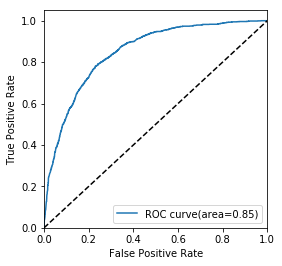

In [275]:
draw_roc(pred_df.Churn,pred_df.Churn_prob)

## finding optimal cutoff point


In [276]:
#creating columns with different cut off

In [279]:
num=[float (x)/10 for x in range(0,10)]
for i in num:
    pred_df[i]=pred_df.Churn_prob.map(lambda x:1 if x>i else 0)

In [280]:
pred_df.head()

,Churn,Churn_prob,custID,Prediction,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.282193,879,0,1,1,1,0,0,0,0,0,0,0
1,0,0.268192,5790,0,1,1,1,0,0,0,0,0,0,0
2,1,0.689531,6498,1,1,1,1,1,1,1,1,0,0,0
3,1,0.534214,880,1,1,1,1,1,1,1,0,0,0,0
4,1,0.674332,2784,1,1,1,1,1,1,1,1,0,0,0


In [283]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [float (x)/10 for x in range(0,10)]
for i in num:
    cm1 = metrics.confusion_matrix(pred_df.Churn, pred_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.261479,1.000000,0.000000
0.1,0.1,0.619667,0.946387,0.503989
0.2,0.2,0.722674,0.850039,0.677579
0.3,0.3,0.771434,0.780109,0.768363
0.4,0.4,0.795002,0.671329,0.838790
0.5,0.5,0.804754,0.537685,0.899312
0.6,0.6,0.800284,0.385392,0.947180
0.7,0.7,0.779764,0.205128,0.983219
0.8,0.8,0.749289,0.050505,0.996699
0.9,0.9,0.738521,0.000000,1.000000


In [284]:
#let's visualise the above

<Figure size 720x576 with 0 Axes>

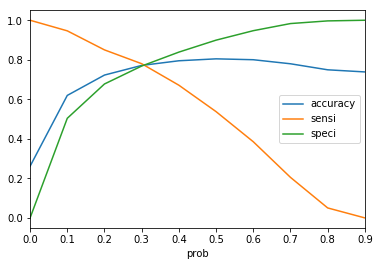

In [289]:
plt.figure(figsize=(10,8))
cutoff_df.plot.line(x="prob",y=["accuracy","sensi","speci"])
plt.show()

In [290]:
#o.3 is the optimal line 

In [292]:
pred_df.head()

,Churn,Churn_prob,custID,Prediction,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.282193,879,0,1,1,1,0,0,0,0,0,0,0
1,0,0.268192,5790,0,1,1,1,0,0,0,0,0,0,0
2,1,0.689531,6498,1,1,1,1,1,1,1,1,0,0,0
3,1,0.534214,880,1,1,1,1,1,1,1,0,0,0,0
4,1,0.674332,2784,1,1,1,1,1,1,1,1,0,0,0


In [299]:
pred_df=pred_df.rename(columns={0.3:"final"})

In [300]:
pred_df.head()

,Churn,Churn_prob,custID,Prediction,0.0,0.1,0.2,final,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.282193,879,0,1,1,1,0,0,0,0,0,0,0
1,0,0.268192,5790,0,1,1,1,0,0,0,0,0,0,0
2,1,0.689531,6498,1,1,1,1,1,1,1,1,0,0,0
3,1,0.534214,880,1,1,1,1,1,1,1,0,0,0,0
4,1,0.674332,2784,1,1,1,1,1,1,1,1,0,0,0


In [302]:
confusion2=metrics.confusion_matrix(pred_df.Churn,pred_df.final)
confusion2

array([[2793,  842],
       [ 283, 1004]], dtype=int64)

In [309]:
#let's check the accuracy score,sensitivity and specitivity
round(100*(metrics.accuracy_score(pred_df.Churn,pred_df.final)),2) 



77.14

In [310]:
#sensitivity
round(100*(confusion2[1,1]/(confusion2[1,1]+confusion2[1,0])),2)

78.01

In [311]:
#specificity
round(100*(confusion2[0,0]/(confusion2[0,0]+confusion2[0,1])),2)

76.84

In [313]:
#let's check the other way round for precision score and recall score
from sklearn.metrics import precision_score,recall_score
round(100*(precision_score(pred_df.Churn,pred_df.final)),2)

54.39

In [314]:
round(100*(recall_score(pred_df.Churn,pred_df.final)),2)

78.01

In [321]:
#let's visualise for optimal point
from sklearn.metrics import precision_recall_curve
p,r,threshold=precision_recall_curve(pred_df.Churn,pred_df.Churn_prob)

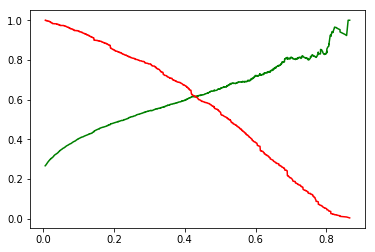

In [323]:
plt.plot(threshold,p[:-1],"g-")
plt.plot(threshold,r[:-1],"r-")

In [324]:
#seems 0.4 is perfect

# prediction on test

In [326]:
x_test.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_Fiber optic,InternetService_No,...,Contract_One year,Contract_Two year,gender_Male,MultipleLines_Yes,OnlineSecurity_Yes,StreamingMovies_Yes,StreamingTV_Yes,TechSupport_Yes,DeviceProtection_Yes,OnlineBackup_Yes
942,0,0,0,24,1,1,79.85,2001.00,1,0,...,0,0,1,0,0,1,0,0,0,0
3730,0,1,0,57,1,1,104.50,5921.35,1,0,...,0,0,0,1,0,1,1,0,1,1
1761,0,0,0,58,1,1,24.45,1513.60,0,1,...,0,1,1,1,0,0,0,0,0,0
2283,0,0,0,1,1,1,71.55,71.55,1,0,...,0,0,1,0,0,0,0,0,0,0
1872,0,1,1,41,1,0,19.70,804.25,0,1,...,0,1,0,0,0,0,0,0,0,0


In [329]:
y_test.head()

942     0
3730    1
1761    0
2283    1
1872    0
Name: Churn, dtype: int64

In [330]:
x_test[['tenure','MonthlyCharges','TotalCharges']] = scaler.transform(x_test[['tenure','MonthlyCharges','TotalCharges']])

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [331]:
x_test=x_test[col]
x_test.head()

,SeniorCitizen,tenure,PaperlessBilling,InternetService_Fiber optic,InternetService_No,PaymentMethod_Credit card (automatic),PaymentMethod_Mailed check,Contract_One year,Contract_Two year,MultipleLines_Yes,OnlineSecurity_Yes,StreamingTV_Yes,TechSupport_Yes
942,0,-0.347623,1,1,0,1,0,0,0,0,0,0,0
3730,0,0.999203,1,1,0,1,0,0,0,1,0,1,0
1761,0,1.040015,1,0,1,1,0,0,1,1,0,0,0
2283,0,-1.286319,1,1,0,0,1,0,0,0,0,0,0
1872,0,0.346196,0,0,1,0,0,0,1,0,0,0,0


In [332]:
x_test_lm=sm.add_constant(x_test)

C:\Users\User\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [342]:
log4=sm.GLM(y_train,x_train_lm,family=sm.families.Binomial())

In [346]:
lr_model=log4.fit()

In [344]:
y_test_pred=lr_model.predict(x_test_lm)

In [347]:
y_test_pred[:10]

942     0.397413
3730    0.270295
1761    0.010238
2283    0.612692
1872    0.015869
1970    0.727206
2532    0.302131
1616    0.010315
2485    0.632881
5914    0.126451
dtype: float64

In [353]:
df=pd.DataFrame({"custID":df.index,"Churn":y_test.values,"Churn_prob":y_test_pred})
df.head()

,custID,Churn,Churn_prob
942,942,0,0.397413
3730,3730,1,0.270295
1761,1761,0,0.010238
2283,2283,1,0.612692
1872,1872,0,0.015869


In [378]:
df["Final"]=df.Churn_prob.map(lambda x:1 if x>0.4 else 0)

In [379]:
df.head()

,custID,Churn,Churn_prob,Final
942,942,0,0.397413,0
3730,3730,1,0.270295,0
1761,1761,0,0.010238,0
2283,2283,1,0.612692,1
1872,1872,0,0.015869,0


In [380]:
#accuracy
round(100*(metrics.accuracy_score(df.Churn,df.Final)),2)

78.15

In [381]:
#confusion metrics
con=metrics.confusion_matrix(df.Churn,df.Final)
con

array([[1269,  259],
       [ 202,  380]], dtype=int64)

In [382]:
#sensitivity
round(100*(con[1,1]/(con[1,1]+con[1,0])),2)


65.29

In [383]:
round(100*(con[0,0]/(con[0,1]+con[0,0])),2)

83.05

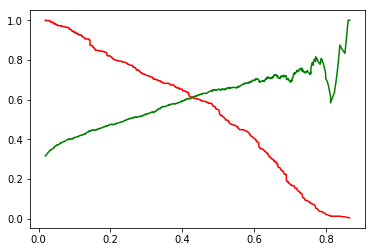

In [384]:
#seems model is performing well
p,r,threshold=precision_recall_curve(df.Churn,df.Churn_prob)
plt.plot(threshold,p[:-1],"g-")
plt.plot(threshold,r[:-1],"r-")